In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 72s 0us/step


In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [10]:
from tensorflow.keras import Input 

model = models.Sequential([
    Input(shape=(32, 32, 3)),  # Define the input shape using the Input layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])


In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 2s - 6ms/step - accuracy: 0.0951 - loss: 2.3057
Test accuracy: 0.09510000050067902


In [13]:
predictions = model.predict(test_images)
print(predictions[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
[-0.03775677 -0.07259798 -0.1472989  -0.00228084 -0.02241265  0.06222985
 -0.08887602  0.06965615  0.04923962  0.0549328 ]


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.3506 - loss: 1.7467 - val_accuracy: 0.5492 - val_loss: 1.2811
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.5784 - loss: 1.1886 - val_accuracy: 0.6281 - val_loss: 1.0580
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.6461 - loss: 1.0040 - val_accuracy: 0.6638 - val_loss: 0.9472
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.6847 - loss: 0.8973 - val_accuracy: 0.6902 - val_loss: 0.8981
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7223 - loss: 0.7917 - val_accuracy: 0.6885 - val_loss: 0.8921
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.7364 - loss: 0.7447 - val_accuracy: 0.7023 - val_loss: 0.8627
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7609 - loss: 0.6808 - val_accuracy: 0.7101 - val_loss: 0.8374
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.7793 -

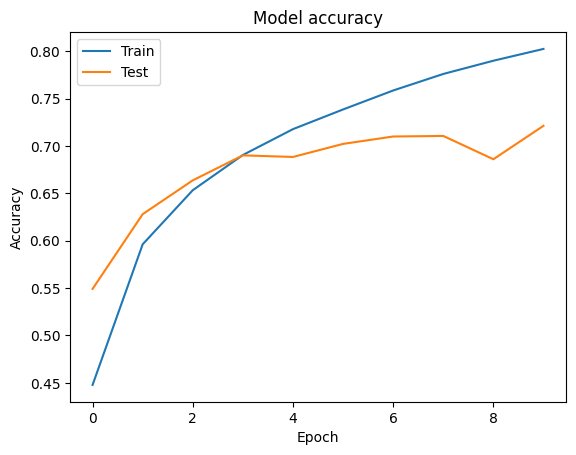

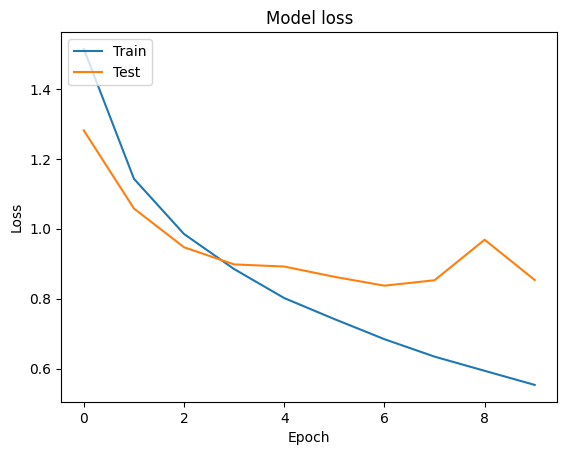

In [15]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [17]:
# Save the model as a .h5 file
model.save('best_image_classification_model.h5')
